In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
#make_blobs群級資料生成器
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

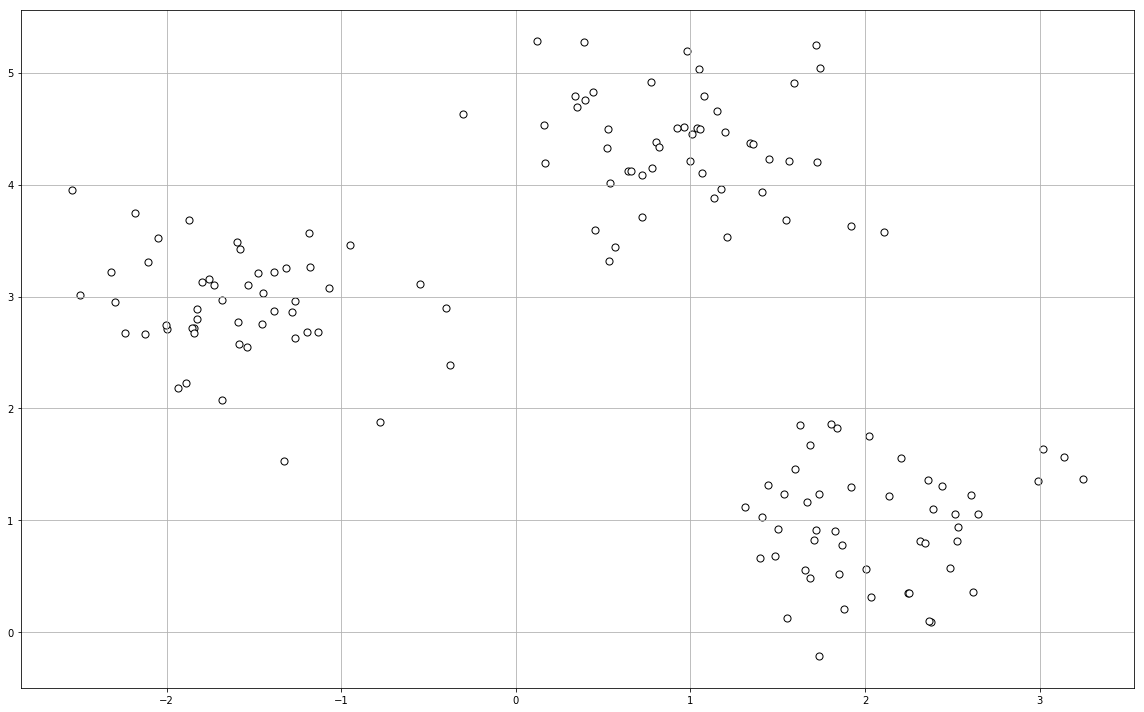

In [3]:
plt.figure(figsize=(16,10))
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('11_01.png', dpi=300)#存圖
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

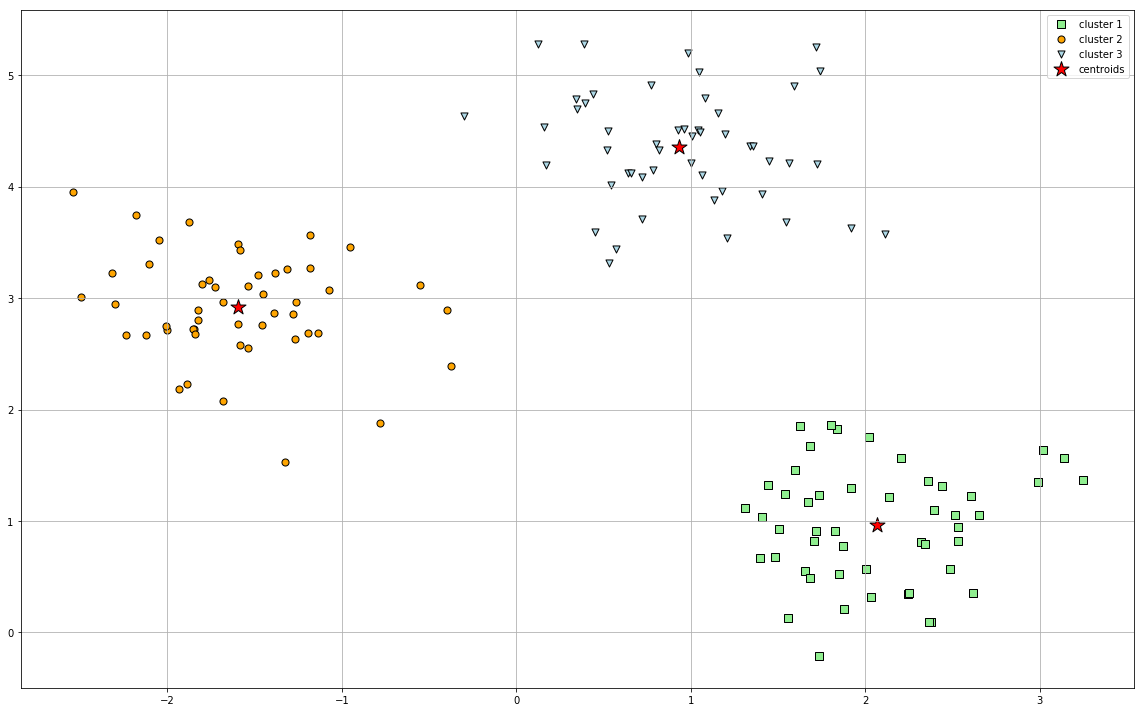

In [5]:
plt.figure(figsize=(16,10))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0],  X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)#存圖
plt.show()

## elbow method

In [6]:
print('Distortion: %.2f' % km.inertia_)#組內平方和

Distortion: 72.48


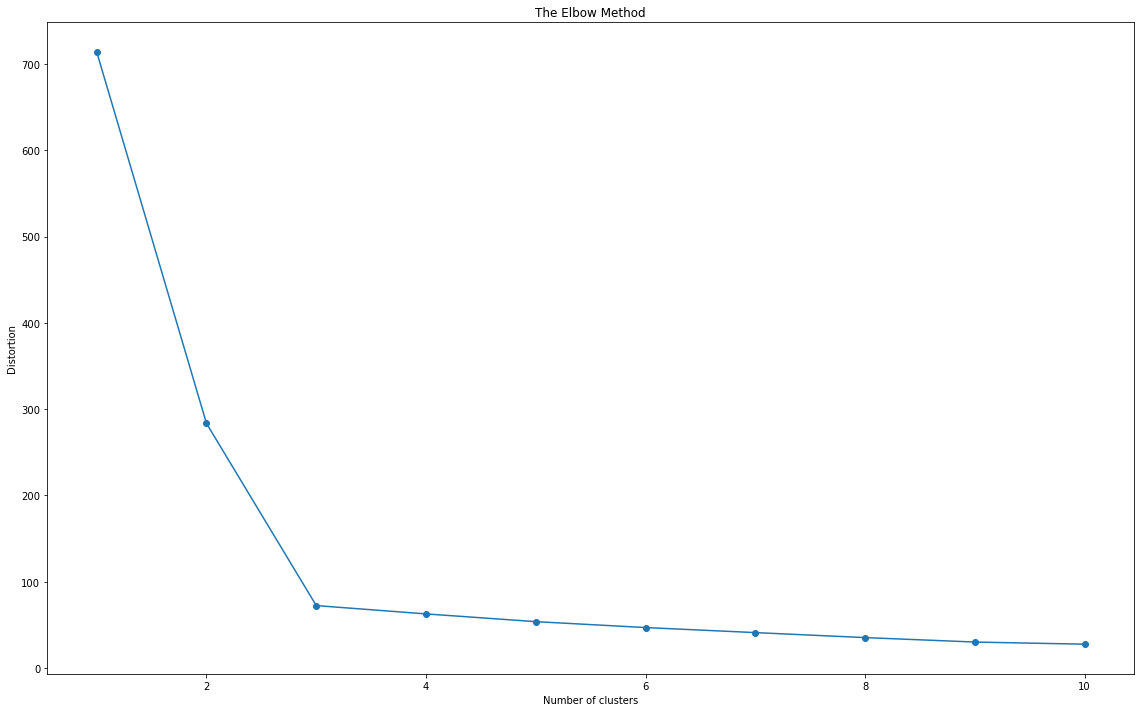

In [7]:
plt.figure(figsize=(16,10))
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

## Silhouette analysis

- s介於-1到1
- s越大，群集差異越大
- s越小，群集差異越小

如圖所示，s指標為0.7，表示集群分得還不錯


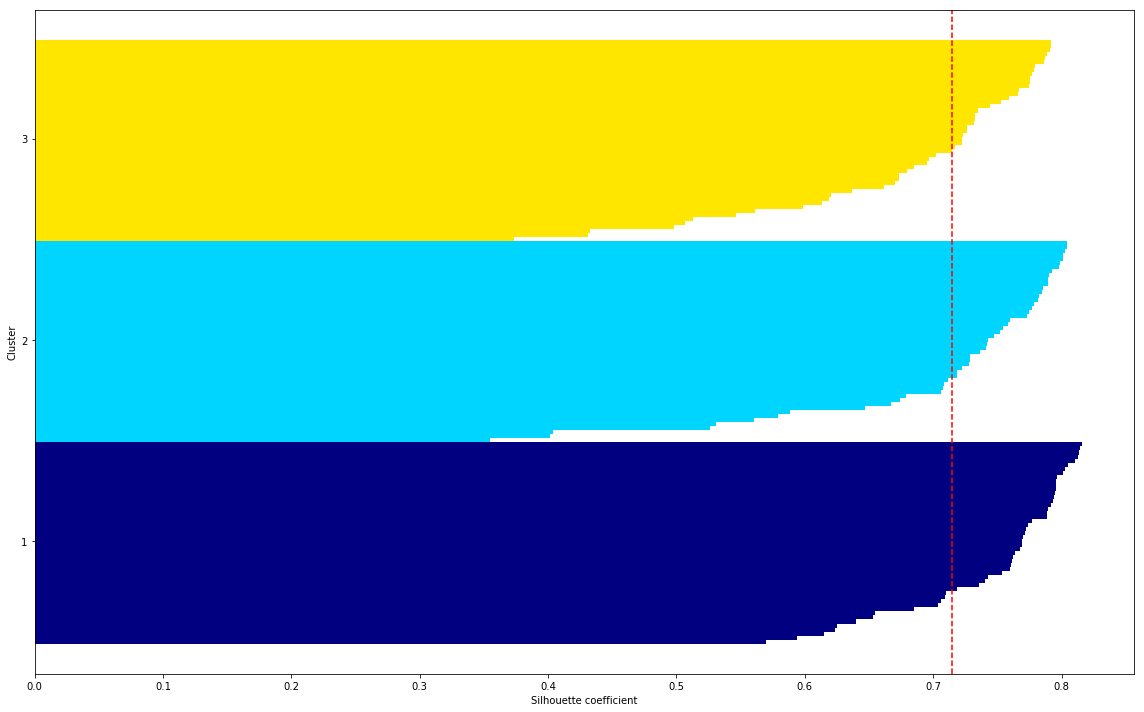

In [8]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
print('如圖所示，s指標為0.7，表示集群分得還不錯')
plt.figure(figsize=(16,10))
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()


將K為2跑集群


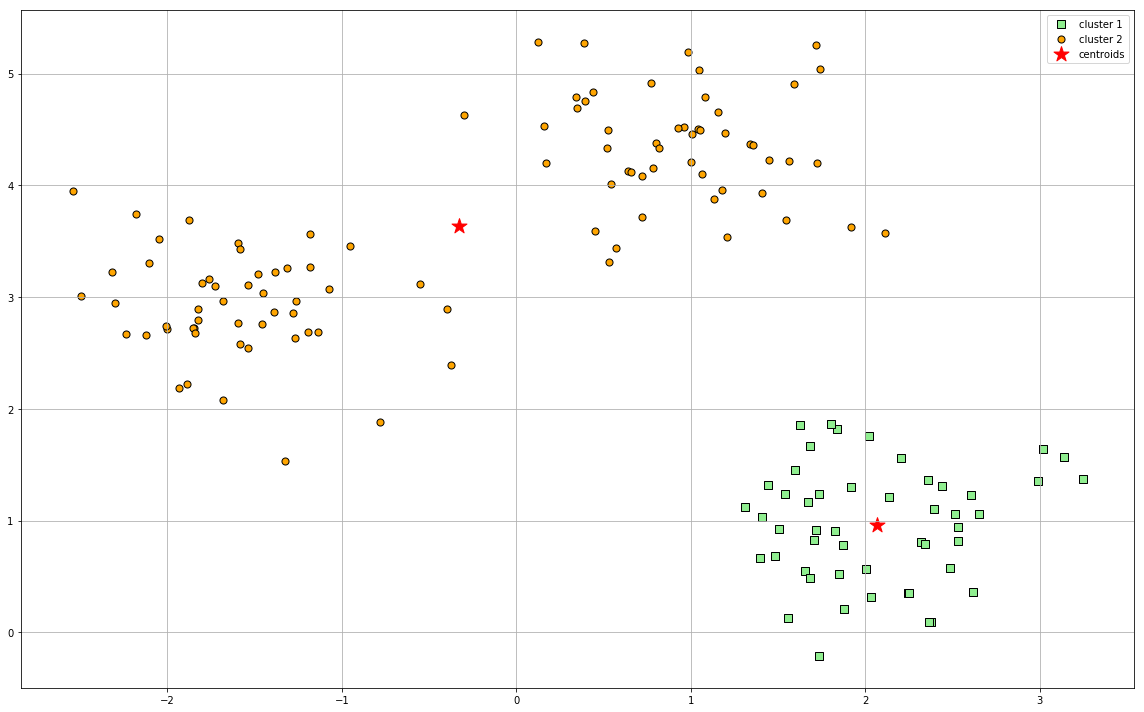

In [9]:
print('將K為2跑集群')
plt.figure(figsize=(16,10))
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

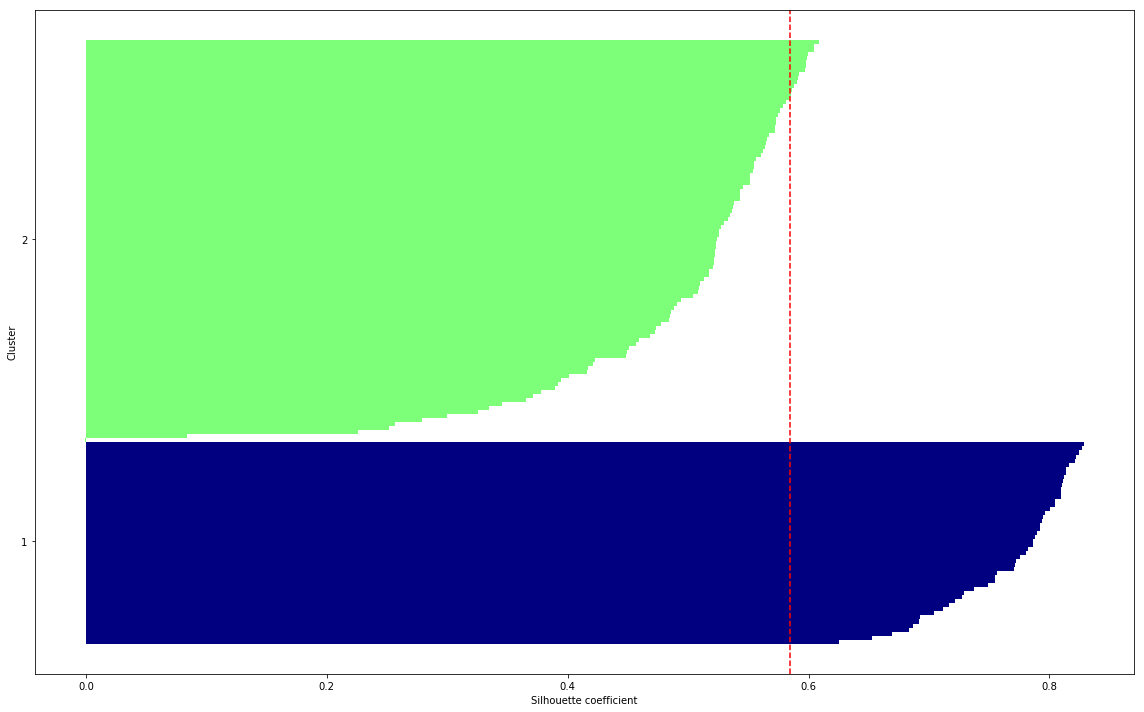

In [10]:
plt.figure(figsize=(16,10))
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

## 階層群集

### 聚集分層群集

In [11]:
np.random.seed(889)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,4.285595,8.079778,7.495962
ID_1,4.052768,2.747346,4.002417
ID_2,5.041450,9.835053,4.127234
ID_3,2.563463,8.718115,5.946592
ID_4,0.904768,3.115822,2.591582


In [12]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,6.379177,3.873066,2.402865,7.753952
ID_1,6.379177,0.000000,7.157420,6.453521,3.469313
ID_2,3.873066,7.157420,0.000000,3.270784,8.038558
ID_3,2.402865,6.453521,3.270784,0.000000,6.737436
ID_4,7.753952,3.469313,8.038558,6.737436,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [13]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,3.0,3.598485,2.0
cluster 2,1.0,4.0,5.178734,2.0
cluster 3,2.0,5.0,5.607248,3.0
cluster 4,6.0,7.0,13.035257,5.0


In [14]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,3.0,2.402865,2.0
cluster 2,1.0,4.0,3.469313,2.0
cluster 3,2.0,5.0,3.873066,3.0
cluster 4,6.0,7.0,8.038558,5.0


In [15]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,3.0,2.402865,2.0
cluster 2,1.0,4.0,3.469313,2.0
cluster 3,2.0,5.0,3.873066,3.0
cluster 4,6.0,7.0,8.038558,5.0


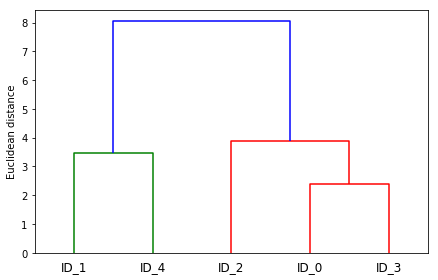

In [16]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

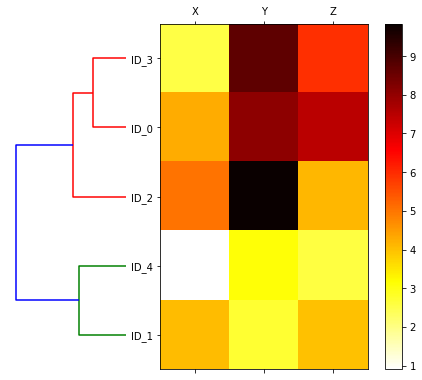

In [17]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()